# 表达式操作

符号操作系统最有用的特征之一是对表达式的展开/化简等简化数学表达式的能力.SymPy有几十个功能来执行各种简化.

还有一个名为`simplify()`的通用函数可以以智能方式应用所有这些函数,以获得最简单形式的表达式.这里有些例子

In [1]:
from sympy import init_printing
init_printing(use_unicode=True)

## 通用的启发式化简`simplify()`

这个函数可以隐式的化简数学表达式

In [2]:
from sympy import symbols,simplify,sin,cos,gamma

x, y, z = symbols('x y z')

In [3]:
simplify(sin(x)**2 + cos(x)**2)

In [4]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [5]:
simplify(gamma(x)/gamma(x - 2))

**ps: gamma(x)是伽马函数 $\Gamma x$**

需要注意的是:

我们看到`simplify()`能够处理大多数表达式,但是`simplify()`有一个缺陷--它只是应用SymPy中的所有主要的简化操作,并隐式的确定最简单的结果.这个`最简单`不是一个定义明确的术语.因此有时候我们还是得手动操作

例如，假设我们想简化$ x^2+ 2x+1 $到$(x + 1)^2$,但实际上结果却不对

In [6]:
simplify(x**2 + 2*x + 1)

我们没有得到我们想要的.有一个函数来执行这个简化,称为`factor()`因式分解.

In [7]:
from sympy import factor

In [8]:
factor(x**2 + 2*x + 1)

此外simplify函数速度比较慢,因此,条件允许的话最好使用特定的函数处理简化问题而不是使用通用的`simplify()`函数.

除上面的优点外,使用特定函数简化还有以下优点:

+ 特定函数对其输出的形式具有明确形式保证

    例如:当对具有有理系数的多项式进行调用时,`factor()`保证将多项式因子代入不可约因子;`simplify()`没有这一保证.
    
+ 在交互式使用时,当你只想将表达式简化为更简单的形式时,`simplify()`是个好选择.但如果要更加精确的结果,simplify就不合适了

## 多项式/有理函数的展开和因式分解

***将几个多项式的积构建成变量的每一次都只有一个系数的形式***被称为多项式的展开;

***把一个多项式在一个范围(如实数范围内分解,即所有项均为实数)化为几个整式的积的形式***被称作这个多项式的因式分解;

SymPy支持这些操作

### `expand()`函数用来展开多项式

In [9]:
from sympy import expand
expand((x + 1)**2)

In [10]:
expand((x + 2)*(x - 3))

### `factor()`函数用来将多项式因式分解

In [11]:
from sympy import factor
factor(expand(x**2 + 2*x + 1))

### `collect()`函数聚合表达式中公因子

`collect()`可以将多元多项式中的一个指定变量作为变量,其他作为常量

In [12]:
from sympy import collect
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [13]:
collected_expr = collect(expr, x)
collected_expr

### `cancel()`将取任何有理函数,并将其放入标准规范形式$ \frac p q$

其中`p`和`q`是没有公因子的扩展多项式,`p`和`q`的前导系数没有分母(即是整数)

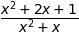

In [14]:
from sympy import cancel
expr = (x**2 + 2*x + 1)/(x**2 + x)
expr

In [15]:
cancel(expr)

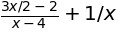

In [16]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr

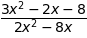

In [17]:
cancel(expr)

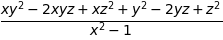

In [18]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

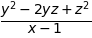

In [19]:
cancel(expr)

需要注意的是cancel不会自己因式分解,依然需要使用factor函数来做

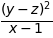

In [20]:
factor(expr)

### `apart()`对有理函数执行部分分数分解

In [21]:
from sympy import apart

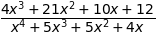

In [22]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

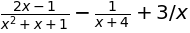

In [23]:
apart(expr)

## 三角函数分解

### 反三角函数

SymPy遵循Python对反三角函数的命名约定,即将一个a附加到函数名称的前面.例如:反余弦或反余弦称为`acos()`

In [24]:
from sympy import sin,cos,tan,sec,asin,acos,atan,cosh,sinh,tanh

### `trigsimp()`使用三角标识简化表达式


这个方法它同样可以对双曲三角函数有效

In [25]:
from sympy import trigsimp

In [26]:
expr = sin(x)**2 + cos(x)**2
expr

In [27]:
trigsimp(expr)

In [28]:
expr = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4
expr

In [29]:
trigsimp(expr)

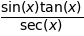

In [30]:
expr = sin(x)*tan(x)/sec(x)
expr

In [31]:
trigsimp(expr)

In [32]:
expr = cosh(x)**2 + sinh(x)**2
expr

In [33]:
trigsimp(expr)

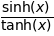

In [34]:
expr = sinh(x)/tanh(x)
expr

In [35]:
trigsimp(expr)

### `expand_trig()`展开三角函数

In [36]:
from sympy import expand_trig

In [37]:
expr = sin(x + y)
expr

In [38]:
expand_trig(expr)

In [39]:
expr = tan(2*x)
expr

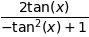

In [40]:
expand_trig(expr)

## 指数简化

### `powsimp()`从上到下,从左到右的合并指数

In [41]:
from sympy import symbols,powsimp,sqrt

In [42]:
a, b = symbols('a b', real=True)
z, t, c, n,m,k = symbols('z t c n m k')

In [43]:
expr = x**a*x**b
expr

In [44]:
powsimp(expr)

In [45]:
expr = x**a*y**a
expr

In [46]:
powsimp(expr)

可以使用参数force=true将底数合并

In [47]:
expr = t**c*z**c
expr

In [48]:
powsimp(expr)

In [49]:
powsimp(expr,force=True)

指数合并同样可以用在开根上,毕竟$ \sqrt 2 = 2^{\frac 1 2}$

In [50]:
(z*t)**2

In [51]:
sqrt(x*y)

### `expand_power_exp()` 和 `expand_power_base()` 展开指数或者底

In [52]:
from sympy import expand_power_exp,expand_power_base

In [53]:
expr = x**(a + b)
expr

In [54]:
expand_power_exp(expr)

In [55]:
expr = (x*y)**a
expr

In [56]:
expand_power_base(expr)

### `powdenest()`将指数叠高

In [57]:
from sympy import powdenest

In [58]:
expr = (x**a)**b
expr

In [59]:
powdenest(expr)

In [60]:
expr = (z**a)**b
expr

In [61]:
powdenest(expr)

In [62]:
powdenest(expr, force=True)

## 对数分解

### `expand_log()` 对数展开

In [63]:
from sympy import expand_log,log

In [64]:
expand_log(log(x*y))

In [65]:
expand_log(log(x/y))

In [66]:
expand_log(log(x**2))

In [67]:
expand_log(log(x**n))

In [68]:
expand_log(log(z*t))

它同样可以使用force=True参数

In [69]:
expand_log(log(z**2))

In [70]:
expand_log(log(z**2), force=True)

### `logcombine()`将对数求和整合

In [71]:
from sympy import logcombine

In [72]:
logcombine(log(x) + log(y))

In [73]:
logcombine(n*log(x))

In [74]:
logcombine(n*log(z))

同样也可以用force=True

In [75]:
logcombine(n*log(z), force=True)

## 特殊函数

### 阶乘

In [76]:
from sympy import factorial

In [77]:
factorial(n)

### 二项式系数函数 binomial coefficient

In [78]:
from sympy import binomial

In [79]:
binomial(n, k)

### 伽马函数

阶乘函数与伽马函数伽马密切相关.

对于正整数z,$(z-1)!$与伽马函数$ \Gamma (z)= \int_0^\infty t^{z−1}e^{−t}dt$相同

In [80]:
from sympy import gamma

In [81]:
gamma(z)

### `hyper([a_1, ..., a_p], [b_1, ..., b_q], z)`广义超几何函数和其展开`hyperexpand()`

In [82]:
from sympy import hyper,hyperexpand,meijerg

In [83]:
hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

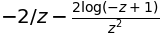

In [84]:
hyperexpand(hyper([1, 2], [3], z))

`hyperexpand()`也适用于更通用的`Meijer G`函数

In [85]:
expr = meijerg([[1],[1]], [[1],[]], -z)
expr

╭─╮1, 1 ⎛1  1 │   ⎞
│╶┐     ⎜     │ -z⎟
╰─╯2, 1 ⎝1    │   ⎠

In [86]:
hyperexpand(expr)

### rewrite方法

处理特殊功能的常见方法是将它们彼此重写.这适用于SymPy中的任何函数,而不只是特殊函数.要根据函数重写表达式,这有点像静态类型语言中的强制类型转换的意思.一个简单的例子就是三角函数中`tan(x)`可以转化为`sin(x)`的表达式

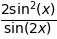

In [87]:
tan(x).rewrite(sin)

In [88]:
factorial(x).rewrite(gamma)

### expand_func函数

要根据某些标识扩展特殊函数可以使用`expand_func`方法

In [89]:
from sympy import expand_func

In [90]:
expand_func(gamma(x + 3))

### `combsimp()`简化组合表达式

In [91]:
from sympy import combsimp

In [92]:
combsimp(factorial(n)/factorial(n - 3))

In [93]:
combsimp(binomial(n+1, k+1)/binomial(n, k))

In [94]:
combsimp(gamma(x)*gamma(1 - x))

## 例子: 连续分数化简

$ a_0 + \frac 1 {a_1 + \frac 1 {a_2 + \frac 1 {... + \frac 1 a_n}}}$




In [95]:
from sympy import Integer

这是一个典型的递归函数,我们可以如此定义

In [96]:
def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr

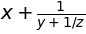

In [97]:
list_to_frac([x, y, z])

In [98]:
list_to_frac([1, 2, 3, 4])

每个有限连续分数是一个有理数,但我们对符号感兴趣,所以让我们创建一个符号的连续子符号.我们使用的symbols()函数来创建这些符号

In [99]:
syms = symbols('a0:5')

In [100]:
frac = list_to_frac(syms)

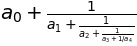

In [101]:
frac

这种形式对于理解连续的分数是有用的,可以更方便的编程,但我们需要将其化简为标准的有理函数形式.

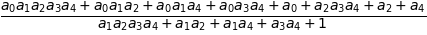

In [102]:
frac = cancel(frac)
frac

假设我们知道它可以重写为连续分数.

我们如何用SymPy做到这一点?

连续分数递归地为$c + \frac 1 f$,其中c是整数,f是(较小的)连续分数.

如果我们可以用这种形式写出表达式,我们可以递归地拉出每个c,并将它添加到列表中.
然后我们可以使用我们的`list_to_frac()`函数获得连续分数

In [103]:
a0,a1,a2,a3,a4 = syms

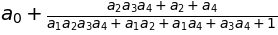

In [104]:
l = []
frac = apart(frac, a0)
frac

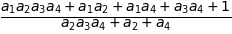

In [105]:
l.append(a0)
frac = 1/(frac - a0)
frac

我们可以重复这一过程

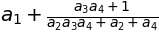

In [106]:
frac = apart(frac, a1)
frac

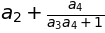

In [107]:
l.append(a1)
frac = 1/(frac - a1)
frac = apart(frac, a2)
frac

In [108]:
l.append(a2)
frac = 1/(frac - a2)
frac = apart(frac, a3)
frac

In [109]:
l.append(a3)
frac = 1/(frac - a3)
frac = apart(frac, a4)
frac

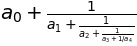

In [110]:
l.append(a4)
list_to_frac(l)